# Importing Important libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the Dataset

In [2]:
train=pd.read_csv("train_black_friday.csv")
test=pd.read_csv("test_black_friday.csv")

# Exploring the Dataset

In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train.shape

(550068, 12)

In [5]:
test.shape

(233599, 11)

# Checking the type of columns in the Data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
User_ID                       233599 non-null int64
Product_ID                    233599 non-null object
Gender                        233599 non-null object
Age                           233599 non-null object
Occupation                    233599 non-null int64
City_Category                 233599 non-null object
Stay_In_Current_City_Years    233599 non-null object
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            161255 non-null float64
Product_Category_3            71037 non-null float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


# Checking the missing values

In [8]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [10]:
print(train["Gender"].unique())
print(train["Age"].unique())
print(train["City_Category"].unique())
print(train["Stay_In_Current_City_Years"].unique())

['F' 'M']
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
['A' 'C' 'B']
['2' '4+' '3' '1' '0']


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [12]:
submission_black_sales=pd.DataFrame()
submission_black_sales["User_ID"]=test["User_ID"]
submission_black_sales["Product_ID"]=test["Product_ID"]

# Data Visualisation

**Visualising Whether Male or Female have made the most purchases**

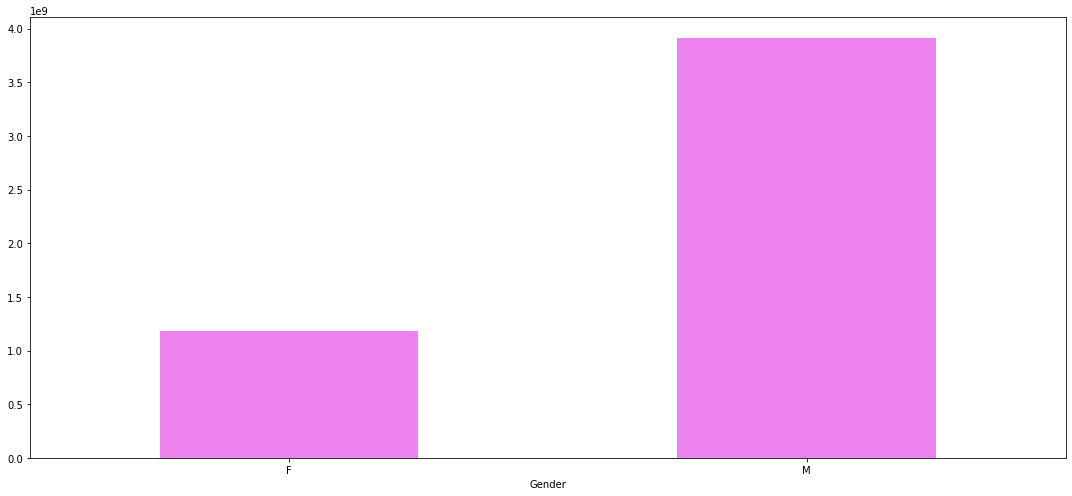

<Figure size 1080x720 with 0 Axes>

In [13]:
train.groupby("Gender").sum()["Purchase"].plot.bar(color="violet", figsize = (15,7))
plt.xticks(rotation=0)
plt.tight_layout()
plt.figure(figsize=(15,10))
plt.show()

** Males Have made the most Purchases of the items **

** Plotting which city have made the most Purchases **

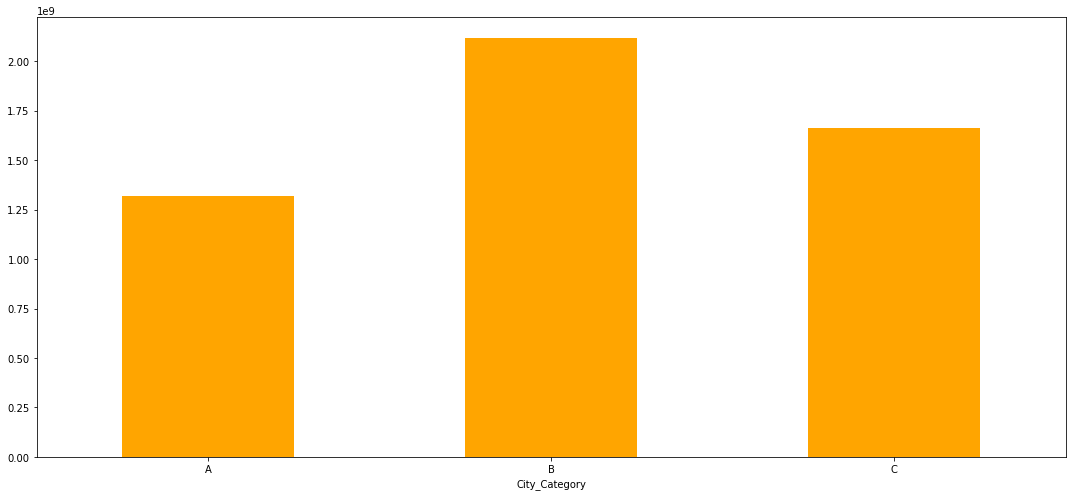

In [14]:
train.groupby("City_Category").sum()["Purchase"].plot.bar(color="Orange", figsize = (15,7))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

** B Category city have made the most Purchases **

** Looking at the Age of the People who have made the most purchases **

In [15]:
train_by_age=train.groupby('Age')['Purchase'].mean().reset_index()
print(train_by_age)

     Age     Purchase
0   0-17  8933.464640
1  18-25  9169.663606
2  26-35  9252.690633
3  36-45  9331.350695
4  46-50  9208.625697
5  51-55  9534.808031
6    55+  9336.280459


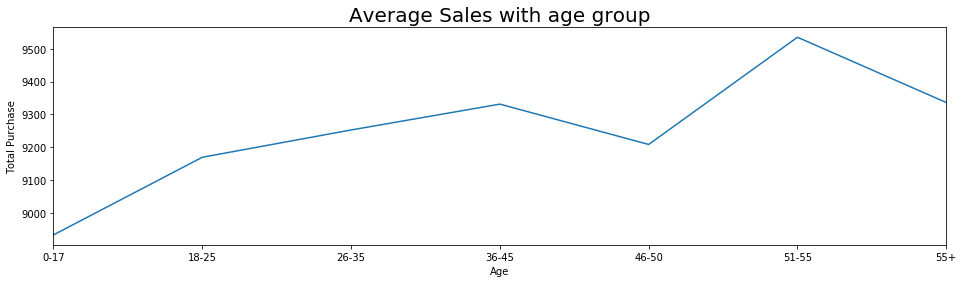

In [16]:
var=train.groupby('Age').Purchase.mean()
fig=plt.figure(figsize=(16,4))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Age Group')
ax.set_ylabel('Total Purchase')
ax.set_title("Average Sales with age group", fontsize=20)
var.plot(kind='line')

** The people with the age group of between 51-55 have made the most purchases **

** Checking how many percentage of Male and Female are There  **

In [17]:
train["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

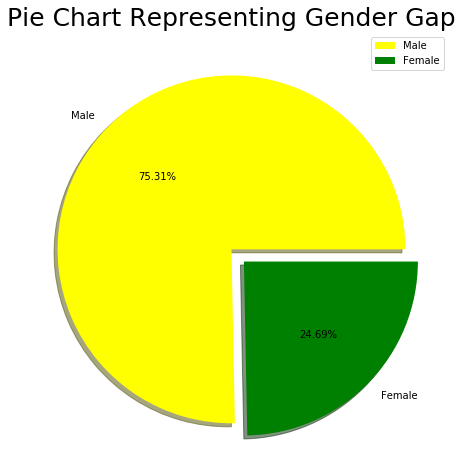

In [18]:
# Plotting a Pie Chart

size=[414259, 135809]
labels="Male", "Female" 
colors=['yellow', 'green']
explode=[0, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels=labels, colors=colors, explode=explode, shadow=True, autopct="%.2f%%")
plt.title("Pie Chart Representing Gender Gap", fontsize=25)
plt.axis('off')
plt.legend()
plt.show()

** Checking if no. Occupation in Years is affecting the Purchases **

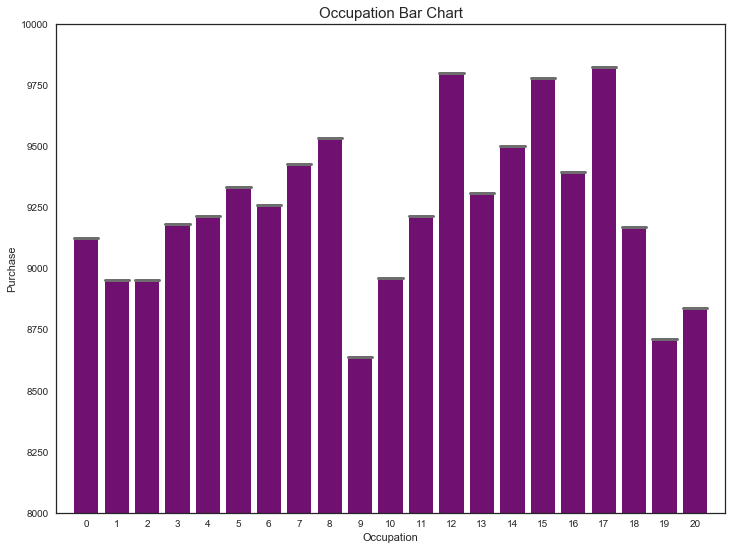

In [19]:
# Group by occupation:
occupation = train.groupby('Occupation')['Purchase'].mean().reset_index()
# Plot bar chart with line plot:
sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax1 = plt.subplots(figsize=(12,9))
sns.barplot(x=occupation['Occupation'],y=occupation['Purchase'],color='purple',ax=ax1)
sns.violinplot(x=occupation['Occupation'],y=occupation['Purchase'],color='salmon',marker="o",ax=ax1)
plt.axis([-1,21,8000,10000])
plt.title('Occupation Bar Chart', fontsize='15')
plt.show()
sns.set()

** One thing we can say that the person who have more than 10 yrs of experience have made more Purchases when compared with others **

** Determining which are the best selling Products in Platform **

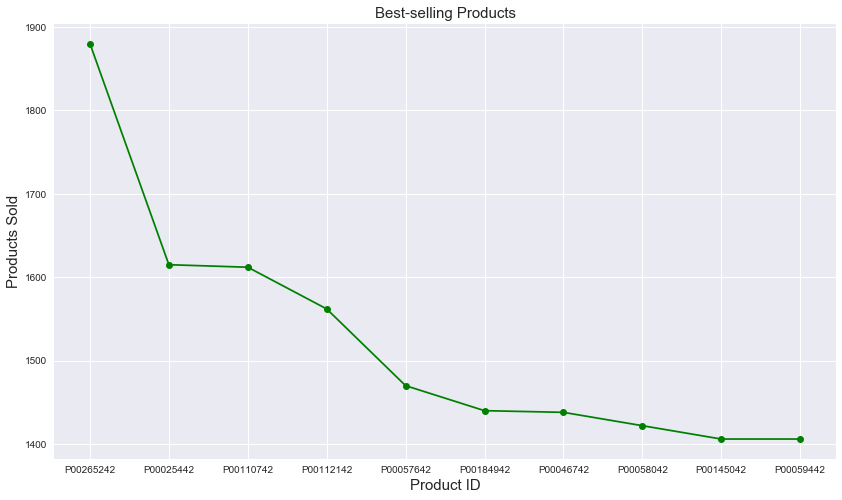

In [20]:
# Group by product ID
product = train.groupby('Product_ID')['Purchase'].count().reset_index()
product.rename(columns={'Purchase':'Count'},inplace=True)
product_sorted = product.sort_values('Count',ascending=False)
# Plot line plot
plt.figure(figsize=(14,8))
plt.plot(product_sorted['Product_ID'][:10], product_sorted['Count'][:10], linestyle='-', color='green', marker='o')
plt.title("Best-selling Products", fontsize='15')
plt.xlabel('Product ID', fontsize='15')
plt.ylabel('Products Sold', fontsize='15')
plt.show()

** The Product ID with P00265242 is the most made purchase item **

In [21]:
train["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [22]:
train.drop(["User_ID","Product_ID"],axis=1,inplace=True)
test.drop(["User_ID","Product_ID"],axis=1,inplace=True)

In [23]:
# Encode Categorical Variables
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for name in train.columns:
    if train[name].dtypes=="O":
        train[name]=train[name].astype(str)
        le.fit(train[name])
        train[name]=le.transform(train[name])

In [24]:
# Doing the same for the test dataset
for name in test.columns:
    if test[name].dtypes=="O":
        test[name]=test[name].astype(str)
        le.fit(test[name])
        test[name]=le.transform(test[name])

# Checking the type of the dataset once more

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
Gender                        550068 non-null int32
Age                           550068 non-null int32
Occupation                    550068 non-null int64
City_Category                 550068 non-null int32
Stay_In_Current_City_Years    550068 non-null int32
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int32(4), int64(4)
memory usage: 33.6 MB


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 9 columns):
Gender                        233599 non-null int32
Age                           233599 non-null int32
Occupation                    233599 non-null int64
City_Category                 233599 non-null int32
Stay_In_Current_City_Years    233599 non-null int32
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            161255 non-null float64
Product_Category_3            71037 non-null float64
dtypes: float64(2), int32(4), int64(3)
memory usage: 12.5 MB


# Now filling the NA values

In [27]:
train.describe(include="all")

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,0.753105,2.496430,8.076707,1.042640,1.858418,0.409653,5.404270,9.842329,12.668243,9263.968713
std,0.431205,1.353632,6.522660,0.760211,1.289443,0.491770,3.936211,5.086590,4.125338,5023.065394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.000000,2.000000,7.000000,1.000000,2.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.000000,3.000000,14.000000,2.000000,3.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.000000,6.000000,20.000000,2.000000,4.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [28]:
train["Product_Category_3"].describe()

count    166821.000000
mean         12.668243
std           4.125338
min           3.000000
25%           9.000000
50%          14.000000
75%          16.000000
max          18.000000
Name: Product_Category_3, dtype: float64

# Filling all the Missing Values

In [29]:
train["Product_Category_2"].fillna(int(train["Product_Category_2"].mean()), inplace=True)
test["Product_Category_2"].fillna(int(test["Product_Category_2"].mean()), inplace=True)

In [30]:
train["Product_Category_3"].fillna(int(train["Product_Category_3"].mean()), inplace=True)
test["Product_Category_3"].fillna(int(test["Product_Category_3"].mean()), inplace=True)

In [31]:
train.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [32]:
test.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [33]:
train.corr()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender,1.000000,-0.004262,0.117291,-0.004515,0.014660,-0.011603,-0.045594,-0.014051,-0.006003,0.060346
Age,-0.004262,1.000000,0.091463,0.123079,-0.004712,0.311738,0.061197,0.043503,0.037073,0.015839
Occupation,0.117291,0.091463,1.000000,0.034479,0.030005,0.024280,-0.007618,0.000557,0.000246,0.020833
City_Category,-0.004515,0.123079,0.034479,1.000000,0.019946,0.039790,-0.014364,-0.006888,-0.022668,0.061914
Stay_In_Current_City_Years,0.014660,-0.004712,0.030005,0.019946,1.000000,-0.012819,-0.004213,-0.001087,0.000016,0.005422
Marital_Status,-0.011603,0.311738,0.024280,0.039790,-0.012819,1.000000,0.019888,0.011526,0.013978,-0.000463
Product_Category_1,-0.045594,0.061197,-0.007618,-0.014364,-0.004213,0.019888,1.000000,0.331691,0.317944,-0.343703
Product_Category_2,-0.014051,0.043503,0.000557,-0.006888,-0.001087,0.011526,0.331691,1.000000,0.498196,-0.156676
Product_Category_3,-0.006003,0.037073,0.000246,-0.022668,0.000016,0.013978,0.317944,0.498196,1.000000,-0.185945
Purchase,0.060346,0.015839,0.020833,0.061914,0.005422,-0.000463,-0.343703,-0.156676,-0.185945,1.000000


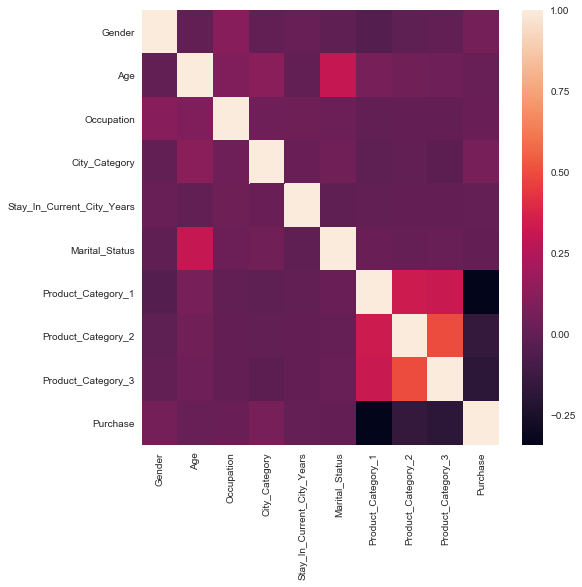

In [34]:
sns.heatmap(train.corr())

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [36]:
X=train.drop("Purchase",axis=1)
y=train["Purchase"]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=1)

# Catboost Regressor

In [37]:
import catboost as cb
cb_1=cb.CatBoostRegressor(loss_function='RMSE', random_state=42)
parameters={'depth' : [6,8,10],
           'learning_rate': [0.01, 0.05, 0.1],
            'iterations': [1000,2000]}
model_4 = GridSearchCV(estimator=cb_1, param_grid = parameters, cv = 2, n_jobs=-1)
model_4.fit(X_train, y_train)

0:	learn: 4863.5489495	total: 458ms	remaining: 7m 37s
1:	learn: 4718.8148279	total: 1.1s	remaining: 9m 11s
2:	learn: 4584.3401247	total: 1.25s	remaining: 6m 57s
3:	learn: 4459.1487737	total: 1.4s	remaining: 5m 48s
4:	learn: 4346.2342821	total: 1.57s	remaining: 5m 13s
5:	learn: 4239.1453996	total: 1.73s	remaining: 4m 46s
6:	learn: 4140.6017665	total: 1.86s	remaining: 4m 24s
7:	learn: 4047.8774600	total: 2.04s	remaining: 4m 13s
8:	learn: 3962.0101627	total: 2.18s	remaining: 4m
9:	learn: 3888.8213836	total: 2.33s	remaining: 3m 51s
10:	learn: 3816.5552763	total: 2.48s	remaining: 3m 43s
11:	learn: 3748.7117474	total: 2.63s	remaining: 3m 36s
12:	learn: 3691.7783416	total: 2.77s	remaining: 3m 30s
13:	learn: 3633.8011559	total: 2.93s	remaining: 3m 26s
14:	learn: 3581.1548036	total: 3.08s	remaining: 3m 22s
15:	learn: 3534.1373237	total: 3.22s	remaining: 3m 18s
16:	learn: 3492.5983808	total: 3.37s	remaining: 3m 15s
17:	learn: 3454.5838533	total: 3.55s	remaining: 3m 13s
18:	learn: 3416.3922086	to

149:	learn: 2932.5846980	total: 23.6s	remaining: 2m 13s
150:	learn: 2931.6140160	total: 23.8s	remaining: 2m 13s
151:	learn: 2931.4493388	total: 23.9s	remaining: 2m 13s
152:	learn: 2931.0636710	total: 24s	remaining: 2m 13s
153:	learn: 2930.5645037	total: 24.2s	remaining: 2m 12s
154:	learn: 2930.2223928	total: 24.3s	remaining: 2m 12s
155:	learn: 2929.7895684	total: 24.5s	remaining: 2m 12s
156:	learn: 2929.4103394	total: 24.6s	remaining: 2m 12s
157:	learn: 2929.0131705	total: 24.8s	remaining: 2m 12s
158:	learn: 2928.5124333	total: 24.9s	remaining: 2m 11s
159:	learn: 2928.1139227	total: 25.1s	remaining: 2m 11s
160:	learn: 2927.7717478	total: 25.2s	remaining: 2m 11s
161:	learn: 2927.4913652	total: 25.4s	remaining: 2m 11s
162:	learn: 2927.1118553	total: 25.5s	remaining: 2m 11s
163:	learn: 2926.7767191	total: 25.7s	remaining: 2m 11s
164:	learn: 2926.4231602	total: 25.9s	remaining: 2m 10s
165:	learn: 2926.1354411	total: 26s	remaining: 2m 10s
166:	learn: 2925.6450379	total: 26.2s	remaining: 2m 

298:	learn: 2885.2782003	total: 45.7s	remaining: 1m 47s
299:	learn: 2884.8481660	total: 45.9s	remaining: 1m 47s
300:	learn: 2884.7375947	total: 46s	remaining: 1m 46s
301:	learn: 2884.6232166	total: 46.2s	remaining: 1m 46s
302:	learn: 2884.3781999	total: 46.3s	remaining: 1m 46s
303:	learn: 2884.1226333	total: 46.5s	remaining: 1m 46s
304:	learn: 2883.6407759	total: 46.6s	remaining: 1m 46s
305:	learn: 2883.4484206	total: 46.8s	remaining: 1m 46s
306:	learn: 2883.2367588	total: 46.9s	remaining: 1m 45s
307:	learn: 2883.0137246	total: 47s	remaining: 1m 45s
308:	learn: 2882.8600231	total: 47.2s	remaining: 1m 45s
309:	learn: 2882.7349710	total: 47.3s	remaining: 1m 45s
310:	learn: 2882.6329826	total: 47.5s	remaining: 1m 45s
311:	learn: 2882.4910046	total: 47.6s	remaining: 1m 45s
312:	learn: 2882.2634442	total: 47.8s	remaining: 1m 44s
313:	learn: 2882.0484205	total: 47.9s	remaining: 1m 44s
314:	learn: 2881.9827285	total: 48.1s	remaining: 1m 44s
315:	learn: 2881.8512097	total: 48.2s	remaining: 1m 

447:	learn: 2852.5236546	total: 1m 7s	remaining: 1m 23s
448:	learn: 2852.4691308	total: 1m 7s	remaining: 1m 23s
449:	learn: 2852.1715439	total: 1m 7s	remaining: 1m 22s
450:	learn: 2852.0859755	total: 1m 8s	remaining: 1m 22s
451:	learn: 2851.7979153	total: 1m 8s	remaining: 1m 22s
452:	learn: 2851.6261449	total: 1m 8s	remaining: 1m 22s
453:	learn: 2851.5547268	total: 1m 8s	remaining: 1m 22s
454:	learn: 2851.0669857	total: 1m 8s	remaining: 1m 22s
455:	learn: 2850.9885726	total: 1m 8s	remaining: 1m 22s
456:	learn: 2850.7743674	total: 1m 8s	remaining: 1m 21s
457:	learn: 2850.5969934	total: 1m 9s	remaining: 1m 21s
458:	learn: 2850.3684096	total: 1m 9s	remaining: 1m 21s
459:	learn: 2850.0300687	total: 1m 9s	remaining: 1m 21s
460:	learn: 2849.7137565	total: 1m 9s	remaining: 1m 21s
461:	learn: 2849.5649473	total: 1m 9s	remaining: 1m 21s
462:	learn: 2849.3631764	total: 1m 9s	remaining: 1m 20s
463:	learn: 2849.2382698	total: 1m 9s	remaining: 1m 20s
464:	learn: 2849.0236149	total: 1m 10s	remaining

594:	learn: 2826.8188095	total: 1m 29s	remaining: 1m
595:	learn: 2826.6851332	total: 1m 29s	remaining: 1m
596:	learn: 2826.5239052	total: 1m 29s	remaining: 1m
597:	learn: 2826.3958032	total: 1m 29s	remaining: 1m
598:	learn: 2826.2425142	total: 1m 30s	remaining: 1m
599:	learn: 2826.0857593	total: 1m 30s	remaining: 1m
600:	learn: 2825.8877130	total: 1m 30s	remaining: 60s
601:	learn: 2825.7416256	total: 1m 30s	remaining: 59.8s
602:	learn: 2825.6706165	total: 1m 30s	remaining: 59.7s
603:	learn: 2825.5295074	total: 1m 30s	remaining: 59.6s
604:	learn: 2825.4061281	total: 1m 31s	remaining: 59.4s
605:	learn: 2825.2967610	total: 1m 31s	remaining: 59.3s
606:	learn: 2825.1608089	total: 1m 31s	remaining: 59.1s
607:	learn: 2824.9882110	total: 1m 31s	remaining: 59s
608:	learn: 2824.9126449	total: 1m 31s	remaining: 58.8s
609:	learn: 2824.8792208	total: 1m 31s	remaining: 58.6s
610:	learn: 2824.7406255	total: 1m 31s	remaining: 58.5s
611:	learn: 2824.5941934	total: 1m 32s	remaining: 58.4s
612:	learn: 28

742:	learn: 2809.5599163	total: 1m 51s	remaining: 38.5s
743:	learn: 2809.4531711	total: 1m 51s	remaining: 38.4s
744:	learn: 2809.3717834	total: 1m 51s	remaining: 38.2s
745:	learn: 2809.2695671	total: 1m 51s	remaining: 38.1s
746:	learn: 2809.1886756	total: 1m 52s	remaining: 38s
747:	learn: 2809.0535014	total: 1m 52s	remaining: 37.8s
748:	learn: 2808.9102768	total: 1m 52s	remaining: 37.7s
749:	learn: 2808.8004224	total: 1m 52s	remaining: 37.6s
750:	learn: 2808.6107798	total: 1m 52s	remaining: 37.4s
751:	learn: 2808.4515526	total: 1m 53s	remaining: 37.3s
752:	learn: 2808.2640303	total: 1m 53s	remaining: 37.2s
753:	learn: 2808.2065229	total: 1m 53s	remaining: 37s
754:	learn: 2808.0667471	total: 1m 53s	remaining: 36.9s
755:	learn: 2807.9116646	total: 1m 53s	remaining: 36.7s
756:	learn: 2807.8575240	total: 1m 54s	remaining: 36.6s
757:	learn: 2807.7338871	total: 1m 54s	remaining: 36.5s
758:	learn: 2807.6462168	total: 1m 54s	remaining: 36.3s
759:	learn: 2807.5055095	total: 1m 54s	remaining: 36

892:	learn: 2794.0570598	total: 2m 14s	remaining: 16.1s
893:	learn: 2793.9770113	total: 2m 14s	remaining: 16s
894:	learn: 2793.9124268	total: 2m 14s	remaining: 15.8s
895:	learn: 2793.8434376	total: 2m 14s	remaining: 15.7s
896:	learn: 2793.7049122	total: 2m 15s	remaining: 15.5s
897:	learn: 2793.6127492	total: 2m 15s	remaining: 15.4s
898:	learn: 2793.4818676	total: 2m 15s	remaining: 15.2s
899:	learn: 2793.4133372	total: 2m 15s	remaining: 15.1s
900:	learn: 2793.2737075	total: 2m 15s	remaining: 14.9s
901:	learn: 2793.1950456	total: 2m 15s	remaining: 14.8s
902:	learn: 2793.0177194	total: 2m 15s	remaining: 14.6s
903:	learn: 2792.9380273	total: 2m 16s	remaining: 14.4s
904:	learn: 2792.8741054	total: 2m 16s	remaining: 14.3s
905:	learn: 2792.7459825	total: 2m 16s	remaining: 14.1s
906:	learn: 2792.5994862	total: 2m 16s	remaining: 14s
907:	learn: 2792.5123995	total: 2m 16s	remaining: 13.9s
908:	learn: 2792.4119819	total: 2m 16s	remaining: 13.7s
909:	learn: 2792.3324446	total: 2m 17s	remaining: 13

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000022ABA55DCC0>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10], 'iterations': [1000, 2000],
                         'learning_rate': [0.01, 0.05, 0.1]})

In [38]:
prediction_4=model_4.predict(X_test)
prediction_4

array([ 7115.46815306,  2418.91879126,  5255.78535629, ...,
        6770.82014723,  8109.66922215, 13858.66999707])

In [39]:
mae=print ('MAE is:', mean_absolute_error(y_test, prediction_4))
rmse=print ('RMSE is:', sqrt(mean_squared_error(y_test, prediction_4)))

MAE is: 2122.5171527804346
RMSE is: 2848.1980183915966


In [40]:
prediction_purchase_4=model_4.predict(test)

In [41]:
submission_black_sales["Purchase"]=prediction_purchase_4
submission_black_sales.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,14871.814257
1,1000009,P00113442,11221.022952
2,1000010,P00288442,6865.846218
3,1000010,P00145342,3066.859394
4,1000011,P00053842,2450.386560


In [42]:
submission_black_4=submission_black_sales[["Purchase","User_ID","Product_ID"]]
submission_black_4.to_csv(r"C:\Users\Robinhood\submission_black_4.csv",index=False)
submission_black_4.head()

,Purchase,User_ID,Product_ID
0,14871.814257,1000004,P00128942
1,11221.022952,1000009,P00113442
2,6865.846218,1000010,P00288442
3,3066.859394,1000010,P00145342
4,2450.386560,1000011,P00053842
